<a href="https://colab.research.google.com/github/vstrogalev/DA-property-analyse-202209/blob/main/Practice_Var_7_Strogalev_V.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Исследование объявлений о продаже квартир

## Общее описание проекта 
В распоряжении данные сервиса о продаже квартир в Санкт-Петербурге и соседних населённых пунктов за несколько лет. Нужно изучить влияние различных факторов на рыночную стоимость объектов недвижимости. 

## Описание признакового пространства 
По каждой квартире на продажу доступны следующие признаки. 

|Признак|Описание признака|
|-------------:|:------------|
|airports_nearest|расстояние до ближайшего аэропорта в метрах (м)|
|balcony|число балконов|
|ceiling_height|высота потолков (м)|
|cityCenters_nearest|расстояние до центра города (м)|
|days_exposition| сколько дней было размещено объявление (от публикации до снятия)|
|first_day_exposition|дата публикации|
|floor|этаж|
|floors_total| всего этажей в доме|
|is_apartment|апартаменты (булев тип)|
|kitchen_area|площадь кухни в квадратных метрах (м²)|
|last_price|цена на момент снятия с публикации|
|living_area|жилая площадь в квадратных метрах(м²)|
|locality_name|название населённого пункта|
|open_plan|свободная планировка (булев тип)|
|parks_around3000|число парков в радиусе 3 км|
|parks_nearest|расстояние до ближайшего парка (м)|
|ponds_around3000|число водоёмов в радиусе 3 км|
|ponds_nearest|расстояние до ближайшего водоёма (м)|
|rooms|число комнат|
|studio|квартира-студия (булев тип)|
|total_area|площадь квартиры в квадратных метрах (м²)|
|total_images|число фотографий квартиры в объявлении|

Пояснение: апартаменты — это нежилые помещения, не относящиеся к жилому фонду, но имеющие необходимые условия для проживания.

## Инструкции по выполнению проекта

Шаг 1. Откройте файл с данными и изучите общую информацию

Шаг 2. Предобработка данных
- Привести данные к необходимым типам;
- Исследовать дублирующиеся записи;
- Обработать аномальные наблюдения;
- Обработать пропущенные значения.

Шаг 3. Посчитайте и добавьте в таблицу:
цену квадратного метра;
день недели, месяц и год публикации объявления;
этаж квартиры; варианты — первый, последний, другой;
соотношение жилой и общей площади, а также отношение площади кухни к общей.

Шаг 4. Проведите исследовательский анализ данных и выполните инструкции:
- Изучите следующие параметры: площадь, цена, число комнат, высота потолков. Постройте гистограммы для каждого параметра.
- Изучите время продажи квартиры. Постройте гистограмму. Посчитайте среднее и медиану. 
- Какие факторы больше всего влияют на стоимость квартиры? Изучите, зависит ли цена от площади, числа комнат, удалённости от центра. Изучите зависимость цены от того, на каком этаже расположена квартира: первом, последнем или другом. Также изучите зависимость от даты размещения: дня недели, месяца и года.
- Выберите 10 населённых пунктов с наибольшим числом объявлений. Посчитайте среднюю цену квадратного метра в этих населённых пунктах. Выделите среди них населённые пункты с самой высокой и низкой стоимостью жилья. Эти данные можно найти по имени в столбце 'locality_name'.
- Изучите предложения квартир: для каждой квартиры есть информация о расстоянии до центра. Выделите квартиры в Санкт-Петербурге ('locality_name'). 
- Выделите сегмент квартир в центре. Проанализируйте эту территорию и изучите следующие параметры: площадь, цена, число комнат, высота потолков. Также выделите факторы, которые влияют на стоимость квартиры (число комнат, этаж, удалённость от центра, дата размещения объявления). 

Шаг 5. Проверьте гипотезы о равенстве стоимости квартир в центральной части Санкт-Петербурге и других квартир.

In [ ]:
# импорт библиотек
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from scipy import stats

import warnings
warnings.filterwarnings('ignore')

from pylab import rcParams

rcParams["figure.figsize"] = 10, 6

In [ ]:
pd.set_option('display.precision', 2)

### Открытие файла

In [ ]:
df_raw = pd.read_csv('project7.csv', sep='\t')

### Предобработка

Предварительно выполним функцию convert_dtypes() и выведем основную информацию о данных

In [ ]:
df_raw = df_raw.convert_dtypes()
df_raw.head(5).T

,0,1,2,3,4
total_images,20,7,10,0,2
last_price,13000000,3350000,5196000,64900000,10000000
total_area,108.0,40.4,56.0,159.0,100.0
first_day_exposition,2019-03-07T00:00:00,2018-12-04T00:00:00,2015-08-20T00:00:00,2015-07-24T00:00:00,2018-06-19T00:00:00
rooms,3,1,2,3,2
ceiling_height,2.7,<NA>,<NA>,<NA>,3.03
floors_total,16,11,5,14,14
living_area,51.0,18.6,34.3,<NA>,32.0
floor,8,1,4,9,13
is_apartment,<NA>,<NA>,<NA>,<NA>,<NA>


In [ ]:
df_raw.describe(include='all').T

,count,unique,top,freq,mean,std,min,25%,50%,75%,max
total_images,23699.0,NaN,NaN,NaN,9.86,5.68,0.0,6.0,9.0,14.0,50.0
last_price,23699.0,NaN,NaN,NaN,6541548.77,10887013.27,12190.0,3400000.0,4650000.0,6800000.0,763000000.0
total_area,23699.0,NaN,NaN,NaN,60.35,35.65,12.0,40.0,52.0,69.9,900.0
first_day_exposition,23699,1491,2018-02-01T00:00:00,368,NaN,NaN,NaN,NaN,NaN,NaN,NaN
rooms,23699.0,NaN,NaN,NaN,2.07,1.08,0.0,1.0,2.0,3.0,19.0
ceiling_height,14504.0,NaN,NaN,NaN,2.77,1.26,1.0,2.52,2.65,2.8,100.0
floors_total,23613.0,NaN,NaN,NaN,10.67,6.6,1.0,5.0,9.0,16.0,60.0
living_area,21796.0,NaN,NaN,NaN,34.46,22.03,2.0,18.6,30.0,42.3,409.7
floor,23699.0,NaN,NaN,NaN,5.89,4.89,1.0,2.0,4.0,8.0,33.0
is_apartment,2775,2,False,2725,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [ ]:
df_raw.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 23699 entries, 0 to 23698
Data columns (total 22 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   total_images          23699 non-null  Int64  
 1   last_price            23699 non-null  Int64  
 2   total_area            23699 non-null  Float64
 3   first_day_exposition  23699 non-null  string 
 4   rooms                 23699 non-null  Int64  
 5   ceiling_height        14504 non-null  Float64
 6   floors_total          23613 non-null  Int64  
 7   living_area           21796 non-null  Float64
 8   floor                 23699 non-null  Int64  
 9   is_apartment          2775 non-null   boolean
 10  studio                23699 non-null  boolean
 11  open_plan             23699 non-null  boolean
 12  kitchen_area          21421 non-null  Float64
 13  balcony               12180 non-null  Int64  
 14  locality_name         23650 non-null  string 
 15  airports_nearest   

## План работы по предобработке
|Признак|Замечание|
|--:|:--|
|`first_day_exposition`|дата не формате даты, конвертировать|
|`cityCenters_nearest`|переименовать в нижний регистр для единообразия|
||Проверить дубли и удалить|
|`ceiling_height`|минимум 1 метр, максимум 100м - поделить на 10, которые в диапазоне 20-50, по остальным удалить записи|
|`days_exposition`|проанализировать и устранить выбросы|
|`floors_total`|не большое количество пропусков - удалить|
|`is_apartment`|много пропусков, у кого пропуски заполнить False так как не указание показателя скорее означает, что это квартира|
|`locality_name`|содержит 49 пропусков, можем удалить|
|`rooms`|содержит 194 записи со значением 0, что не даст посчитать цену на м2. Удалить|
|`living_area`|пропуски заполним расчетным значением медианы соотношения жилой и общей|
|`kitchen_area`|пропуски заполним расчетным значением медианы соотношения жилой и общей|
|`balcony`|заполняем пропуски 0|
|`parks_nearest`|заполняем пропуски штрафом 10000|
|`parks_around3000`|заполняем пропуски штрафом 10000|
|`ponds_nearest`|заполняем пропуски штрафом 10000|
|`ponds_around3000`|заполняем пропуски штрафом 10000|
|`cityCenters_nearest`|заполняем пропуски штрафом 10000|
|`airports_nearest`|заполняем пропуски штрафом 0|
|`ceiling_height`|38% пропусков анализ и удаление с копированием в другой датасет|


#### first_day_exposition

In [ ]:
# Преобразуем дату из типа Object в тип datetime
df_raw.first_day_exposition = pd.to_datetime(df_raw.first_day_exposition)
df_raw.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 23699 entries, 0 to 23698
Data columns (total 22 columns):
 #   Column                Non-Null Count  Dtype         
---  ------                --------------  -----         
 0   total_images          23699 non-null  Int64         
 1   last_price            23699 non-null  Int64         
 2   total_area            23699 non-null  Float64       
 3   first_day_exposition  23699 non-null  datetime64[ns]
 4   rooms                 23699 non-null  Int64         
 5   ceiling_height        14504 non-null  Float64       
 6   floors_total          23613 non-null  Int64         
 7   living_area           21796 non-null  Float64       
 8   floor                 23699 non-null  Int64         
 9   is_apartment          2775 non-null   boolean       
 10  studio                23699 non-null  boolean       
 11  open_plan             23699 non-null  boolean       
 12  kitchen_area          21421 non-null  Float64       
 13  balcony         

#### cityCenters_nearest переименуем в нижний регистр в snake-case стиль

In [ ]:
df_raw.rename(columns={'cityCenters_nearest': 'city_centers_nearest'}, inplace=True)

#### Определим наличие дублей

In [ ]:
# Дублей нет
df_raw.duplicated().sum()

0

#### ceiling_height работа с выбросами 

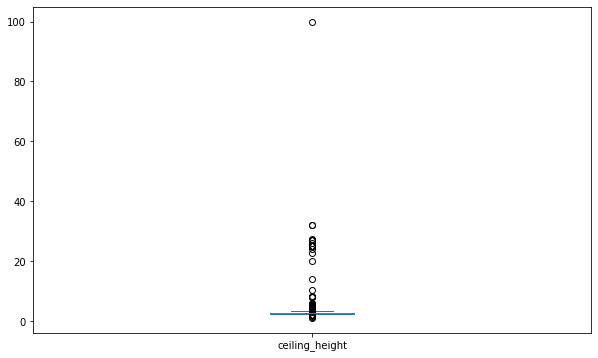

In [ ]:
df_raw.ceiling_height.plot(kind='box')

In [ ]:
# высота потолков имеет не реальные значения, но похоже, что данные в диапазоне 25м - 50м были введены без десятичной точки и их можно разделить на 10
df_raw.ceiling_height[(df_raw.ceiling_height > 25) & (df_raw.ceiling_height < 50)]

3148     32.0
4876     27.0
5246     27.0
5669     26.0
5807     27.0
10773    27.0
17857    27.0
20478    27.0
21377    27.5
21824    27.0
22336    32.0
22938    27.0
Name: ceiling_height, dtype: Float64

In [ ]:
# поделим на 10 высоты от 25 до 50 метров
df_raw.ceiling_height[(df_raw.ceiling_height > 25) & (df_raw.ceiling_height < 50)] = df_raw.ceiling_height[(df_raw.ceiling_height > 25) & (df_raw.ceiling_height < 50)] /10

In [ ]:
# какие еще значения высоты полотка являются выбросами?
df_raw.ceiling_height[(df_raw.ceiling_height > 50) | (df_raw.ceiling_height < 2)]

5712       1.2
16934     1.75
22590      1.0
22869    100.0
Name: ceiling_height, dtype: Float64

In [ ]:
# удалим их
df_raw = df_raw.drop(df_raw.ceiling_height[(df_raw.ceiling_height > 50) | (df_raw.ceiling_height < 2)].index)

#### days_exposition работа с пропусками

In [ ]:
# 3181 строки имеют не заполненное количество дней экспозиции
df_raw.days_exposition.isnull().sum()

3181

In [ ]:
# при этом у нас нет строк, у которых дней экспозиции была пустая и цена была не определена. 
# Таким образом все объекты проданы и можно вычислить дни экспозиции
df_raw.last_price[(df_raw.days_exposition.isnull()) & (df_raw.last_price == 0)].count()

0

Рассчитаем дни экспозиции как разница между конечной датой в таблице и датой first_day_exposition, где конечная дата - максимальная дата, полученная как сумма first_day_exposition и days_exposition.  
Если бы таблица была сформирована прямо сейчас, то мы моглы бы использовать текущаю дату, но так как это не так, то мы не можем использовать текущую дату, так как в этом случае по строкам, где количество дней экспозиции нулевая будет в итоге самое большое количество дней экспозиции. 

In [ ]:
# сформируем временную таблицу, с не нулевыми значениями дней экспозиции
df_tmp = df_raw[['first_day_exposition', 'days_exposition']][~df_raw.days_exposition.isnull()]
df_tmp.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 20514 entries, 1 to 23697
Data columns (total 2 columns):
 #   Column                Non-Null Count  Dtype         
---  ------                --------------  -----         
 0   first_day_exposition  20514 non-null  datetime64[ns]
 1   days_exposition       20514 non-null  Float64       
dtypes: Float64(1), datetime64[ns](1)
memory usage: 500.8 KB


In [ ]:
# получим конечную дату для каждой строки
df_tmp['end_date'] = df_tmp.first_day_exposition + pd.to_timedelta(np.ceil(df_tmp.days_exposition), unit="D")

In [ ]:
df_tmp.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 20514 entries, 1 to 23697
Data columns (total 3 columns):
 #   Column                Non-Null Count  Dtype         
---  ------                --------------  -----         
 0   first_day_exposition  20514 non-null  datetime64[ns]
 1   days_exposition       20514 non-null  Float64       
 2   end_date              20514 non-null  datetime64[ns]
dtypes: Float64(1), datetime64[ns](2)
memory usage: 661.1 KB


In [ ]:
# получим конечную дату в таблице как максимальную дату по показателю end_date
end_date = df_tmp.end_date.max()

In [ ]:
# вернемся в основную таблицу и установим в строках с нулевыми днями экспозиции дату end_date
df_raw['end_date'] = np.NaN
df_raw['end_date'][df_raw.days_exposition.isnull()] = end_date
df_raw.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 23695 entries, 0 to 23698
Data columns (total 23 columns):
 #   Column                Non-Null Count  Dtype         
---  ------                --------------  -----         
 0   total_images          23695 non-null  Int64         
 1   last_price            23695 non-null  Int64         
 2   total_area            23695 non-null  Float64       
 3   first_day_exposition  23695 non-null  datetime64[ns]
 4   rooms                 23695 non-null  Int64         
 5   ceiling_height        14500 non-null  Float64       
 6   floors_total          23609 non-null  Int64         
 7   living_area           21792 non-null  Float64       
 8   floor                 23695 non-null  Int64         
 9   is_apartment          2774 non-null   boolean       
 10  studio                23695 non-null  boolean       
 11  open_plan             23695 non-null  boolean       
 12  kitchen_area          21417 non-null  Float64       
 13  balcony         

In [ ]:
# вычислим дни экспозиции для строк, где этот показатель пропущен
df_raw.days_exposition = df_raw.apply(lambda row: (row.end_date - row.first_day_exposition).days if pd.isnull(row.days_exposition) else row.days_exposition, axis=1)
df_raw.days_exposition = df_raw.days_exposition.astype(int)

#### days_exposition работа с аномалиями

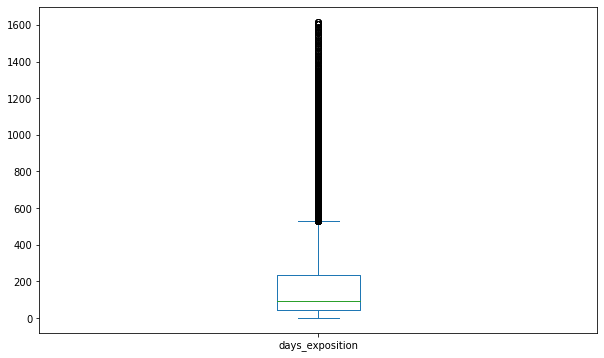

In [ ]:
# построим ящик с усами для оценки наличия выбросов
df_raw.days_exposition.plot(kind='box')

In [ ]:
# оценим распределение по квантилям. Видно, что бОльшая часть данных помещается до 95% квантиля
df_raw.days_exposition.describe(percentiles=[0, .25, .50, .75, .80, .90, .95, .99])

count    23695.00
mean       185.84
std        233.39
min          0.00
0%           0.00
25%         43.00
50%         94.00
75%        237.00
80%        295.00
90%        475.60
95%        668.00
99%       1135.00
max       1618.00
Name: days_exposition, dtype: float64

In [ ]:
# количество строк с крайне большим количеством дней экспозиции по квантилю 95
df_raw.days_exposition[df_raw.days_exposition > 668].count()

1181

In [ ]:
# удалим их ПОКА НЕ УДАЛЯЕМ!!!
# df_raw = df_raw.drop(df_raw[df_raw.days_exposition > 668].index)

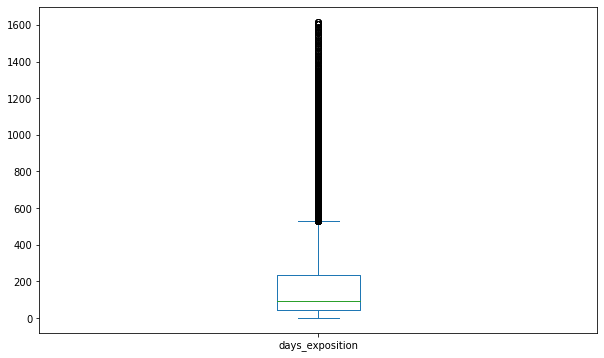

In [ ]:
df_raw.days_exposition.plot(kind='box')

In [ ]:
df_raw.drop('end_date', axis=1, inplace=True)

#### floors_total

In [ ]:
# удалим строки где floors_total пустое так как количество таких записей не существенно
df_raw = df_raw.drop(df_raw[df_raw.floors_total.isnull()].index)

#### is_apartment

In [ ]:
# заполним is_apartment значением False так как апартамены представлены на рынке в гораздо меньшей степени, чем жилая недвижимость 
# и отсутствие значения означает скорее квартиру (по умолчанию) нежели апартаменты, когда это указывают как правило специально 
df_raw.is_apartment = df_raw.is_apartment.fillna(False)

#### locality_name удалим с пустыми значениями

In [ ]:
# удаляем строки с пустыми значениями locality_name
df_raw = df_raw.drop(df_raw[df_raw.locality_name.isnull()].index)

#### rooms где количество комнат не пустое, но равно 0 удалим

In [ ]:
# удалим строки где rooms равно 0
df_raw = df_raw.drop(df_raw[df_raw.rooms == 0].index)

#### living_area большое количество пропусков, заполним медианой соотношения жилой к общей

In [ ]:
# создадим временную таблицу с не пустыми значениями жилой и общей площади
df_liv_vs_tot = df_raw[['living_area', 'total_area']][~df_raw.living_area.isnull() & ~df_raw.total_area.isnull()]

In [ ]:
# получим соотношение жилой к общей площади
df_liv_vs_tot['liv_vs_tot'] = df_liv_vs_tot.living_area / df_liv_vs_tot.total_area

In [ ]:
liv_tot_median = df_liv_vs_tot.liv_vs_tot.median()
liv_tot_median

0.5671641791044777

In [ ]:
df_raw.living_area = df_raw.apply(lambda row: (row.total_area * liv_tot_median) if pd.isnull(row.living_area) else row.living_area, axis=1)

#### kitchen_area

In [ ]:
# создадим временную таблицу с не пустыми значениями кухонной и общей площади
df_kit_vs_tot = df_raw[['kitchen_area', 'total_area']][~df_raw.kitchen_area.isnull() & ~df_raw.total_area.isnull()]

In [ ]:
# получим соотношение кухонной к общей площади
df_kit_vs_tot['kit_vs_tot'] = df_kit_vs_tot.kitchen_area / df_kit_vs_tot.total_area

In [ ]:
kit_tot_median = df_kit_vs_tot.kit_vs_tot.median()
kit_tot_median

0.17235772357723578

In [ ]:
df_raw.kitchen_area = df_raw.apply(lambda row: (row.total_area * kit_tot_median) if pd.isnull(row.kitchen_area) else row.kitchen_area, axis=1)

#### balcony

In [ ]:
# заполним значения по количеству балконов 0, где это не указано
df_raw.balcony = df_raw.balcony.fillna(0)

#### parks_nearest parks_around3000

In [ ]:
# заплняем пропуски штрафом 10000 м
df_raw.parks_nearest = df_raw.parks_nearest.fillna(10000)

In [ ]:
# количество парков заполним 0
df_raw.parks_around3000 = df_raw.parks_around3000.fillna(0)

#### ponds_nearest

In [ ]:
# заплняем пропуски штрафом 10000 м
df_raw.ponds_nearest = df_raw.ponds_nearest.fillna(10000)

In [ ]:
df_raw.ponds_around3000 = df_raw.ponds_around3000.fillna(0)

#### cityCenters_nearest работаем с пропусками

In [ ]:
df_raw.city_centers_nearest.isnull().count()

23367

In [ ]:
df_raw.city_centers_nearest[df_raw.locality_name=='Санкт-Петербург'].describe()

count    15479.00
mean     11579.30
std       4832.96
min        181.00
25%       8310.00
50%      12226.00
75%      14938.00
max      29493.00
Name: city_centers_nearest, dtype: float64

Сравним статистические характеристики объектов в СПБ у которых расстояние от центра не указано с объектами в СПБ у которых расстояние до центра указано и не превышает 3 км

In [ ]:
(df_raw[df_raw.city_centers_nearest.isna() & (df_raw.locality_name=='Санкт-Петербург')].describe() - \
df_raw[~df_raw.city_centers_nearest.isna() & (df_raw.city_centers_nearest < 3000) & (df_raw.locality_name=='Санкт-Петербург')].describe()).T

,count,unique,top,freq,mean,std,min,25%,50%,75%,max
total_images,-570.0,NaN,NaN,NaN,0.6,-1.37,3.0,1.0,0.5,0.0,-30.0
last_price,-570.0,NaN,NaN,NaN,-2362309.34,-10141961.38,715000.0,-2002500.0,-1450000.0,-7500.0,-271300000.0
total_area,-570.0,NaN,NaN,NaN,-13.0,12.5,12.64,-14.06,-20.85,-17.57,-86.0
rooms,-570.0,NaN,NaN,NaN,-0.86,-0.05,0.0,-1.0,-1.0,-1.0,-7.0
ceiling_height,-418.0,NaN,NaN,NaN,-0.25,-0.08,0.0,-0.26,-0.2,-0.3,-1.2
floors_total,-570.0,NaN,NaN,NaN,5.55,4.9,1.0,2.75,4.0,5.0,16.0
living_area,-570.0,NaN,NaN,NaN,-14.27,-0.54,1.5,-9.8,-14.93,-18.62,-112.0
floor,-570.0,NaN,NaN,NaN,2.95,3.26,0.0,1.0,2.0,3.0,15.0
is_apartment,-570,-1,0,-564,NaN,NaN,NaN,NaN,NaN,NaN,NaN
studio,-570,0,0,-570,NaN,NaN,NaN,NaN,NaN,NaN,NaN


Стастистические характеристики показывают, что объекты у которых в СПБ не указано расстояние до центра могут считаться объектами НЕ в центре по следующим причинам:
1. средняя и медиана цены меньше, чем у объектов в СПБ в центре
2. общая и жилая площадь также меньше, соответственно, цена за м2 меньше, чем у объектов в центре
3. этажность больше
4. количество парков меньше, а удаленность от парков и водоемов больше. Учитывая, что в центре СПБ сплошные водоемы, данные объекты скорее находятся вдали от центра 

In [ ]:
# заполняем пропуски штрафом 100 000 м
df_raw.city_centers_nearest = df_raw.city_centers_nearest.fillna(100000)

#### airports_nearest

In [ ]:
df_raw.airports_nearest = df_raw.airports_nearest.fillna(0)

#### ceiling_height анализируем пропуски

In [ ]:
# оценим по разнице показателей описательной статистики набора данных, где ceiling_height не указан и где указан. Оценка нужна для того, чтобы оценить возможные потери данных, 
# при исколючении большого набора
(df_raw[df_raw.ceiling_height.isna()].describe() - df_raw[~df_raw.ceiling_height.isna()].describe()).T

,count,unique,top,freq,mean,std,min,25%,50%,75%,max
total_images,-5423.0,NaN,NaN,NaN,-1.16,0.06,0.0,-1.0,-1.0,-2.0,0.0
last_price,-5423.0,NaN,NaN,NaN,-733199.95,1829769.58,417810.0,-340000.0,-540000.0,-694500.0,343000000.0
total_area,-5423.0,NaN,NaN,NaN,-3.81,-3.65,1.0,-2.23,-3.6,-4.8,-269.0
rooms,-5423.0,NaN,NaN,NaN,-0.16,-0.07,0.0,0.0,0.0,0.0,3.0
ceiling_height,-14395.0,NaN,NaN,NaN,<NA>,<NA>,<NA>,<NA>,<NA>,<NA>,<NA>
floors_total,-5423.0,NaN,NaN,NaN,1.25,0.9,0.0,0.0,0.0,2.0,-24.0
living_area,-5423.0,NaN,NaN,NaN,-3.02,-2.42,1.0,-1.63,-1.41,-3.2,-51.82
floor,-5423.0,NaN,NaN,NaN,0.64,0.6,0.0,0.0,1.0,2.0,3.0
is_apartment,-5423,0,0,-5386,NaN,NaN,NaN,NaN,NaN,NaN,NaN
studio,-5423,0,0,-5424,NaN,NaN,NaN,NaN,NaN,NaN,NaN


видим, что набор данных, где высота потолков не указана отличается от набора, где указана в следующих показателях
1. последняя цена - набор данных без высоты потолков дешевле в среднем на 500 тыс. руб.
2. общая площадь у набора без высоты потолков меньше на 3.8 м2
3. жилая площадь меньше на 1.5 в медане и 3.8 в среднем
4. близость к аэропорту на 190 м ближе
5. близость к центру на 309 м дальше

В целом, я не считаю, что потери при исключении набора записей без высоты потолков существенны, тем не менее, я сформирую новый датасет где показатель высота потолка не будет иметь пропусков, чтобы там, где он существенный, использовать его, а во всех остальных случаях продолжать использовать датасет исходный

In [ ]:
df_ceiling_notna = df_raw[~df_raw.ceiling_height.isna()]
df_ceiling_notna.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 14395 entries, 0 to 23698
Data columns (total 22 columns):
 #   Column                Non-Null Count  Dtype         
---  ------                --------------  -----         
 0   total_images          14395 non-null  Int64         
 1   last_price            14395 non-null  Int64         
 2   total_area            14395 non-null  Float64       
 3   first_day_exposition  14395 non-null  datetime64[ns]
 4   rooms                 14395 non-null  Int64         
 5   ceiling_height        14395 non-null  Float64       
 6   floors_total          14395 non-null  Int64         
 7   living_area           14395 non-null  float64       
 8   floor                 14395 non-null  Int64         
 9   is_apartment          14395 non-null  boolean       
 10  studio                14395 non-null  boolean       
 11  open_plan             14395 non-null  boolean       
 12  kitchen_area          14395 non-null  float64       
 13  balcony         

#### итоговый отчет по данным таблицы

In [ ]:
df_raw.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 23367 entries, 0 to 23698
Data columns (total 22 columns):
 #   Column                Non-Null Count  Dtype         
---  ------                --------------  -----         
 0   total_images          23367 non-null  Int64         
 1   last_price            23367 non-null  Int64         
 2   total_area            23367 non-null  Float64       
 3   first_day_exposition  23367 non-null  datetime64[ns]
 4   rooms                 23367 non-null  Int64         
 5   ceiling_height        14395 non-null  Float64       
 6   floors_total          23367 non-null  Int64         
 7   living_area           23367 non-null  float64       
 8   floor                 23367 non-null  Int64         
 9   is_apartment          23367 non-null  boolean       
 10  studio                23367 non-null  boolean       
 11  open_plan             23367 non-null  boolean       
 12  kitchen_area          23367 non-null  float64       
 13  balcony         

### Шаг 3. Посчитайте и добавьте в таблицу: цену квадратного метра; день недели, месяц и год публикации объявления; этаж квартиры; варианты — первый, последний, другой; соотношение жилой и общей площади, а также отношение площади кухни к общей.

In [ ]:
df_raw['price_per_m'] = df_raw.total_area / df_raw.rooms

In [ ]:
df_raw['day_of_week'] = df_raw.first_day_exposition.dt.day_of_week

In [ ]:
df_raw['month'] = df_raw.first_day_exposition.dt.month

In [ ]:
df_raw['year'] = df_raw.first_day_exposition.dt.year

In [ ]:
df_raw[['price_per_m', 'day_of_week', 'month', 'year']].describe()

,price_per_m,day_of_week,month,year
count,23367.00,23367.00,23367.00,23367.00
mean,30.81,2.57,6.40,2017.37
std,9.75,1.79,3.49,1.04
min,8.00,0.00,1.00,2014.00
25%,23.70,1.00,3.00,2017.00
50%,30.00,3.00,6.00,2017.00
75%,36.00,4.00,10.00,2018.00
max,494.10,6.00,12.00,2019.00


Сформируем показатель floor_category, который будет принимать значение 1 - первый этаж, 2 - последний этаж, 3 - прочие этажи

In [ ]:
def categorize_floor(row):
  if row.floor == row.floors_total:
    return 2
  elif row.floor == 1:
    return 1
  return 3

In [ ]:
df_raw['floor_category'] = df_raw.apply (lambda row: categorize_floor(row), axis=1)

In [ ]:
df_raw[['floor', 'floors_total', 'floor_category']]

,floor,floors_total,floor_category
0,8,16,3
1,1,11,1
2,4,5,3
3,9,14,3
4,13,14,3
...,...,...,...
23694,3,5,3
23695,4,5,3
23696,1,3,1
23697,12,17,3


Сформируем показатели liv_vs_total соотношение жилой и общей площади, а также kicth_vs_total отношение площади кухни к общей

In [ ]:
df_raw['liv_vs_total'] = df_raw.living_area / df_raw.total_area
df_raw['kicth_vs_total'] = df_raw.kitchen_area / df_raw.total_area

In [ ]:
df_raw[['living_area', 'kitchen_area', 'total_area', 'liv_vs_total', 'kicth_vs_total']]

,living_area,kitchen_area,total_area,liv_vs_total,kicth_vs_total
0,51.00,25.00,108.0,0.47,0.23
1,18.60,11.00,40.4,0.46,0.27
2,34.30,8.30,56.0,0.61,0.15
3,90.18,27.40,159.0,0.57,0.17
4,32.00,41.00,100.0,0.32,0.41
...,...,...,...,...,...
23694,73.30,13.83,133.81,0.55,0.1
23695,38.00,8.50,59.0,0.64,0.14
23696,29.70,9.77,56.7,0.52,0.17
23697,43.53,23.30,76.75,0.57,0.3


### Шаг 4. Исследовательский анализ данных

#### - Изучите следующие параметры: площадь, цена, число комнат, высота потолков. Постройте гистограммы для каждого параметра.





In [ ]:
df_raw[['total_area','last_price','rooms','ceiling_height']].describe().T

,count,mean,std,min,25%,50%,75%,max
total_area,23367.0,6.06e+01,3.56e+01,12.0,4.02e+01,5.20e+01,7.00e+01,9.00e+02
last_price,23367.0,6.57e+06,1.09e+07,12190.0,3.45e+06,4.65e+06,6.80e+06,7.63e+08
rooms,23367.0,2.09e+00,1.07e+00,1.0,1.00e+00,2.00e+00,3.00e+00,1.90e+01
ceiling_height,14395.0,2.74e+00,6.47e-01,2.0,2.51e+00,2.65e+00,2.80e+00,2.50e+01


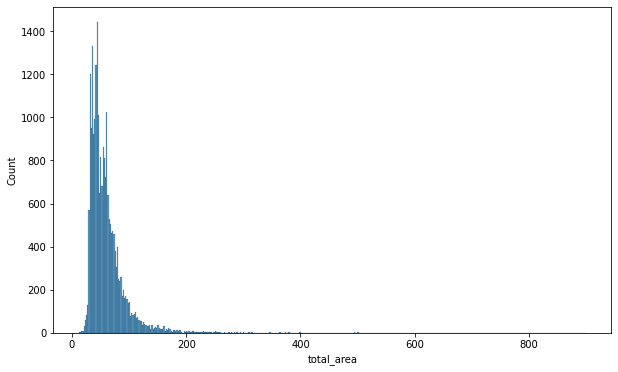

In [ ]:
sns.histplot(df_raw.total_area)

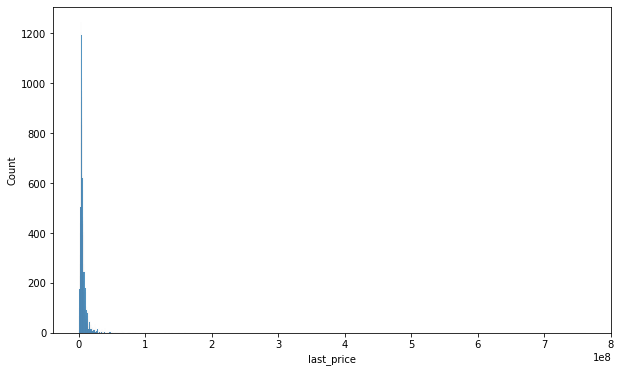

In [ ]:
sns.histplot(df_raw.last_price)

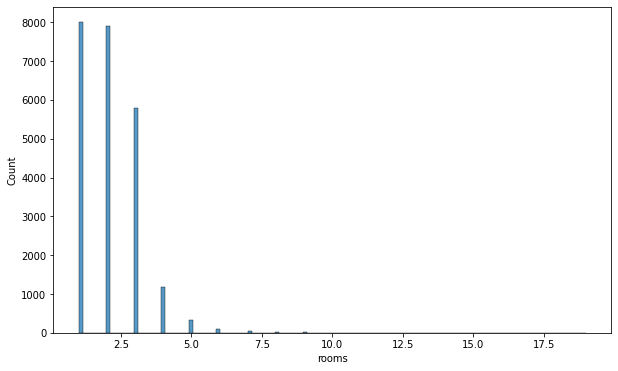

In [ ]:
sns.histplot(df_raw.rooms)

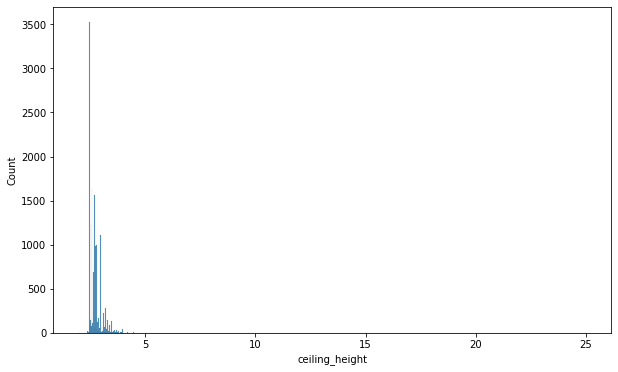

In [ ]:
sns.histplot(df_raw.ceiling_height)

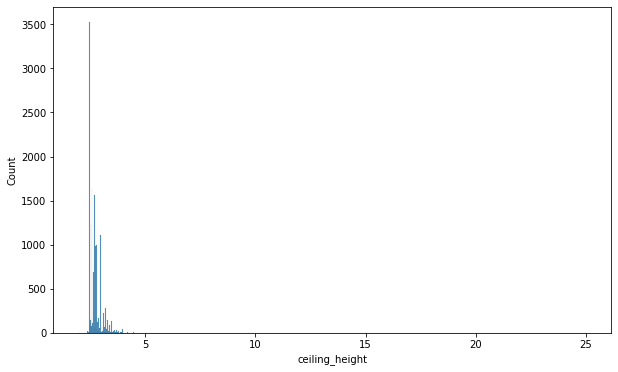

In [ ]:
sns.histplot(df_ceiling_notna.ceiling_height)

#### - Изучите время продажи квартиры. Постройте гистограмму. Посчитайте среднее и медиану. 

In [ ]:
df_raw.days_exposition.describe()

count    23367.00
mean       186.30
std        233.65
min          0.00
25%         43.00
50%         95.00
75%        238.00
max       1618.00
Name: days_exposition, dtype: float64

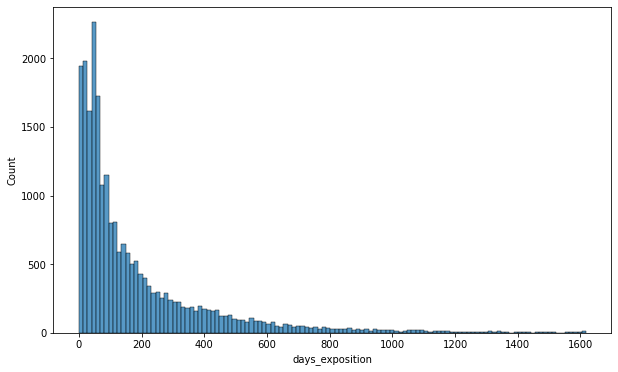

In [ ]:
sns.histplot(df_raw.days_exposition)

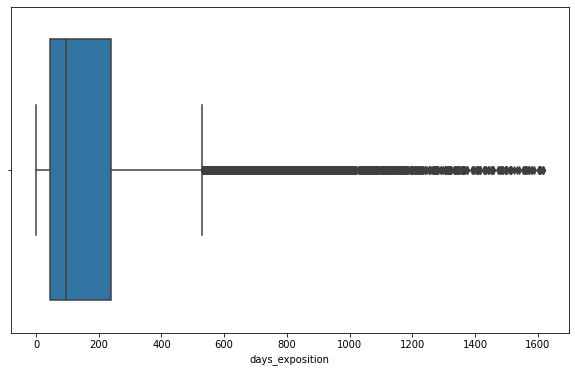

In [ ]:
sns.boxplot(df_raw.days_exposition)

В среднем объекты продаются за 148 дней, медиана 91 дней.  
Обычно (межквартильный размах) от 39 до 210 дей)

#### - Какие факторы больше всего влияют на стоимость квартиры? Изучите, зависит ли цена от площади, числа комнат, удалённости от центра. Изучите зависимость цены от того, на каком этаже расположена квартира: первом, последнем или другом. Также изучите зависимость от даты размещения: дня недели, месяца и года.

In [ ]:
# создадим вспомогательный датасет с числовыми неприрывными показателями
df_price = df_raw[['last_price', 'total_area', 'rooms', 'city_centers_nearest']]

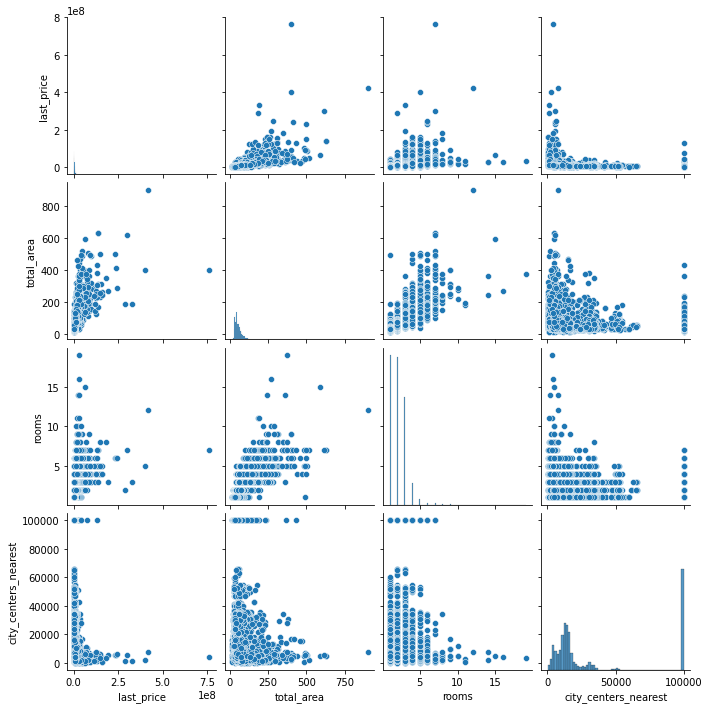

In [ ]:
# получим диаграммы рассеивания по всем показателям
sns.pairplot(df_price)

In [ ]:
df_raw[['last_price', 'total_area', 'rooms', 'city_centers_nearest']].corr()

,last_price,total_area,rooms,city_centers_nearest
last_price,1.00,0.65,0.36,-0.21
total_area,0.65,1.00,0.76,-0.19
rooms,0.36,0.76,1.00,-0.14
city_centers_nearest,-0.21,-0.19,-0.14,1.00


Из всех признаков, общая площадь определенно коррелирует с ценой.  
Количество комнат также небольшую положительную корреляцию.  
Остальные - нет.

Оценка корреляции Цена (неприрывная) и Категория этажа (категориальная)

In [ ]:
stats.pointbiserialr(df_raw.last_price, df_raw.floor_category)

PointbiserialrResult(correlation=0.04135007610422199, pvalue=2.5611886673879677e-10)

Согласно полученным данным по биссериальной корреляции можно судить, что статистически значимой связи между ценой и категории этажа нет. P значение меньше, чем 0.05 указывает на очень высокий уровень определенности.

Зависимость цены от дня недели, месяца, года

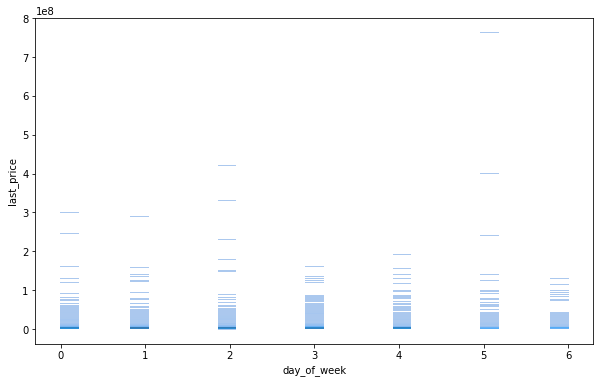

In [ ]:
sns.histplot(data=df_raw, x='day_of_week', y='last_price')

В среду и субботу наибольшие значения цены продаж. В воскресенье - меньшая, что может быть следствием того, что в воскресенье не так удобно проводить сделку (не все организации, необходимые для оформления сделки могут работать) 

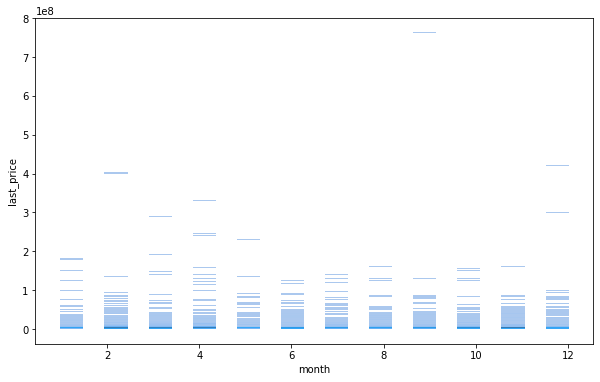

In [ ]:
sns.histplot(data=df_raw, x='month', y='last_price')

Весной и в декабре цена продажи относительно больше. Возможно это влияние месяцев, когда сдаются новые дома (декабрь), а также месяцы, когда получают премию за год (весна и декабрь) 

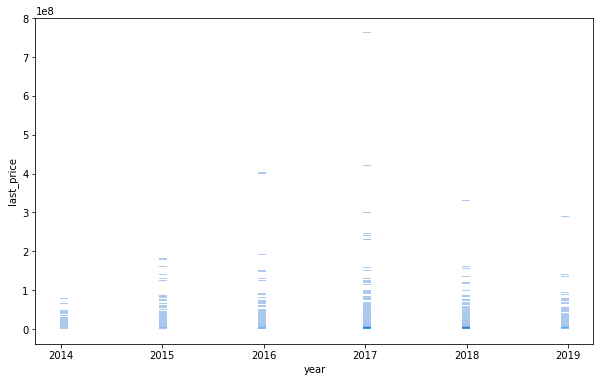

In [ ]:
sns.histplot(data=df_raw, x='year', y='last_price')

В 2017 году отмечается некий рост цены продаж. В среднем имеется тренд на рост цены.

#### - Выберите 10 населённых пунктов с наибольшим числом объявлений. Посчитайте среднюю цену квадратного метра в этих населённых пунктах. Выделите среди них населённые пункты с самой высокой и низкой стоимостью жилья. Эти данные можно найти по имени в столбце 'locality_name'.

In [ ]:
df_raw['locality_name'].value_counts()[:10].sort_values(ascending=False)

Санкт-Петербург      15539
посёлок Мурино         494
посёлок Шушары         435
Всеволожск             392
Пушкин                 369
Колпино                338
посёлок Парголово      323
Гатчина                307
деревня Кудрово        283
Выборг                 237
Name: locality_name, dtype: Int64

In [ ]:
cities_max_adv = df_raw['locality_name'].value_counts()[:10].index.to_list()

In [ ]:
df_raw[['locality_name', 'price_per_m']][df_raw.locality_name.isin(cities_max_adv)].groupby('locality_name').mean().sort_values(by='price_per_m', ascending=False)

,price_per_m
locality_name,
посёлок Парголово,34.6
деревня Кудрово,33.03
посёлок Мурино,32.67
Пушкин,32.23
посёлок Шушары,31.97
Всеволожск,31.54
Санкт-Петербург,31.34
Гатчина,28.37
Выборг,27.93


Поселок Парголово имеет самую высокую среднюю цену квадратного метра, Колпино - самую низкую

#### - Изучите предложения квартир: для каждой квартиры есть информация о расстоянии до центра. Выделите квартиры в Санкт-Петербурге ('locality_name'). 

In [ ]:
df_spb = df_raw[(df_raw.locality_name == 'Санкт-Петербург') & ~df_raw.is_apartment].reset_index(drop=True)
df_spb

,total_images,last_price,total_area,first_day_exposition,rooms,ceiling_height,floors_total,living_area,floor,is_apartment,...,ponds_around3000,ponds_nearest,days_exposition,price_per_m,day_of_week,month,year,floor_category,liv_vs_total,kicth_vs_total
0,20,13000000,108.0,2019-03-07,3,2.7,16,51.00,8,False,...,2,755,57,36.0,3,3,2019,3,0.47,0.23
1,10,5196000,56.0,2015-08-20,2,<NA>,5,34.30,4,False,...,2,574,558,28.0,3,8,2015,3,0.61,0.15
2,0,64900000,159.0,2015-07-24,3,<NA>,14,90.18,9,False,...,3,234,424,53.0,4,7,2015,3,0.57,0.17
3,2,10000000,100.0,2018-06-19,2,3.03,14,32.00,13,False,...,1,48,121,50.0,1,6,2018,3,0.32,0.41
4,5,7915000,71.6,2019-04-18,2,<NA>,24,40.61,22,False,...,0,10000,15,35.8,3,4,2019,3,0.57,0.26
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
15496,13,3550000,35.3,2018-02-28,1,2.86,15,16.30,4,False,...,2,652,29,35.3,2,2,2018,3,0.46,0.26
15497,3,5500000,52.0,2018-07-19,2,<NA>,5,31.00,2,False,...,0,10000,15,26.0,3,7,2018,3,0.6,0.12
15498,11,9470000,72.9,2016-10-13,2,2.75,25,40.30,7,False,...,1,806,519,36.45,3,10,2016,3,0.55,0.15
15499,9,9700000,133.81,2017-03-21,3,3.7,5,73.30,3,False,...,3,381,773,44.6,1,3,2017,3,0.55,0.1


In [ ]:
# у нас есть квартиры со штрафом по расстоянию до центра, им присвоено расстояние 100км. Удалим их из данного датасета
df_spb = df_spb.drop(df_spb[df_spb.city_centers_nearest == 100000].index)

In [ ]:
df_spb.city_centers_nearest.describe()

count    15479.00
mean     11579.30
std       4832.96
min        181.00
25%       8310.00
50%      12226.00
75%      14938.00
max      29493.00
Name: city_centers_nearest, dtype: float64

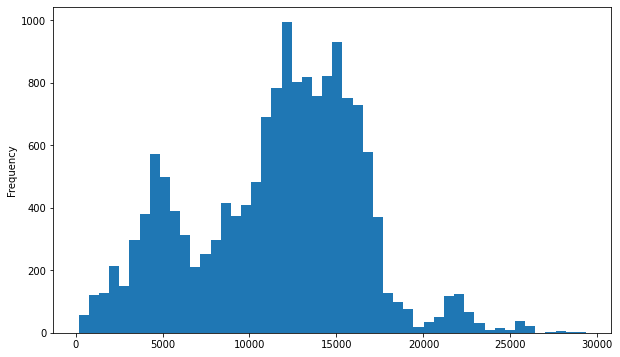

In [ ]:
df_spb.city_centers_nearest.plot(kind='hist', bins=50)

Основываясь на распределении квартир по расстоянию от центра можно сказать, что большая часть предложения приходится на 12 км от центра.  
Далее 17 км предложение резко снижается

#### - Выделите сегмент квартир в центре. Проанализируйте эту территорию и изучите следующие параметры: площадь, цена, число комнат, высота потолков. Также выделите факторы, которые влияют на стоимость квартиры (число комнат, этаж, удалённость от центра, дата размещения объявления). 

Выполним сравнение статистических показателей для объектов в СПБ у которых расстояние до центра не превышает 1 км с остальными объектами в СПБ

In [ ]:
df_spb_center = df_spb[df_spb.city_centers_nearest <= 3000]
print('Санкт-Петербург центр', df_spb_center.shape)
df_spb_suburbs = df_spb[df_spb.city_centers_nearest > 3000]
print('Санкт-Петербург не центра', df_spb_suburbs.shape)

Санкт-Петербург центр (624, 29)
Санкт-Петербург не центра (14817, 29)


In [ ]:
(df_spb[df_spb.city_centers_nearest <= 3000].describe() - \
df_spb[df_spb.city_centers_nearest > 3000].describe()).T

,count,unique,top,freq,mean,std,min,25%,50%,75%,max
total_images,-14193.0,NaN,NaN,NaN,0.36,0.66,0.0,0.0,0.0,1.0,0.0
last_price,-14193.0,NaN,NaN,NaN,10422831.06,18922823.7,2372810.0,3383250.0,4575000.0,7750000.0,-361700000.0
total_area,-14193.0,NaN,NaN,NaN,39.27,21.71,-1.0,23.28,33.0,47.62,-383.0
rooms,-14193.0,NaN,NaN,NaN,1.06,0.41,0.0,1.0,1.0,1.0,-5.0
ceiling_height,-9082.0,NaN,NaN,NaN,0.47,-0.19,0.5,0.45,0.52,0.7,-20.1
floors_total,-14193.0,NaN,NaN,NaN,-6.78,-5.16,1.0,-2.0,-4.0,-10.0,-43.0
living_area,-14193.0,NaN,NaN,NaN,27.28,17.08,7.0,16.92,21.55,31.86,-77.7
floor,-14193.0,NaN,NaN,NaN,-3.25,-3.49,0.0,-1.0,-2.0,-5.0,-24.0
is_apartment,-14193,0,0,-14193,NaN,NaN,NaN,NaN,NaN,NaN,NaN
studio,-14193,-1,0,-14189,NaN,NaN,NaN,NaN,NaN,NaN,NaN


Объекты в центре отличаются от объектов, которые не в центре следующим образом:  
1. цена продажи больше
2. общая, жилая площадь кухни существенно больше
3. цена за м2 больше
4. высота потолков больше
5. этажей в доме меньше
6. количество комнат больше
7. количество парков и водоемов больше, а расстояние до них меньше
8. дней экспозиции больше, объекты продаются дольше

### Шаг 5. Проверьте гипотезы о равенстве стоимости квартир в центральной части Санкт-Петербурге и других квартир.

**Нулевая гипотеза** - средняя цена объектов в центре Санкт-Петербурга равна средней цене объектов вне центра.  
**Альтернативная гипотеза** - средняя цена объектов в центре Санкт-Петербурга отличается от средней цены объектов вне центра.  
Для проверки гипотезы о равенстве средней цены квартир в центральной части и вне центра воспользуемся методом scipy.stats.ttest_ind - тест для средних несвязных выборок.  

In [ ]:
res = stats.ttest_ind(df_spb_center.last_price, df_spb_suburbs.last_price, axis=0, equal_var=True)
res

Ttest_indResult(statistic=19.85945397192467, pvalue=1.1003803715248923e-86)

Значение p значительно меньше, чем 0.05 (2.6409785894917867e-90), что означает, что мы можем отклонить нулевую  гипотезу о равенстве средних цен и принять альтернативную гипотезу о том, что средние цены отличаются

In [ ]:
df_spb_center.last_price.mean()

18047810.38301282

In [ ]:
df_spb_suburbs.last_price.mean()

7624979.321252615